<a href="https://colab.research.google.com/github/meiruv/intro_to_deep_learning_with_pytorch/blob/master/Blood_Cells_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetching the dataset
I follow these instructions : https://www.kaggle.com/general/74235

and then run the command from the dataset page (got it via 'copy API command')

In [2]:
! pip install -q kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download -d paultimothymooney/blood-cells

 94% 102M/108M [00:00<00:00, 136MB/s] 
100% 108M/108M [00:00<00:00, 131MB/s]


I built a predictor for this dataset:
https://www.kaggle.com/paultimothymooney/blood-cells
based on this course:
https://www.udacity.com/course/deep-learning-pytorch--ud188?autoenroll=true

In [4]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [5]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

# Import and preview the data

In [6]:
import os
import zipfile

local_zip = 'blood-cells.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('bloodcells')
zip_ref.close()

In [45]:
def count_class_distribution(path_to_data, class_labels):
  
  dictt = {}
  for labl in class_labels:

    path = f'{path_to_data}/{labl}/'
    x = os.listdir(path)
    dictt[labl] = len(x)

  return dictt

In [47]:
path_to_train = 'bloodcells/dataset2-master/dataset2-master/images/TRAIN'
dictt_train = count_class_distribution(path_to_train, classes)
print(dictt_train)

path_to_test = 'bloodcells/dataset2-master/dataset2-master/images/TEST'
dictt_test = count_class_distribution(path_to_test, classes)
print(dictt_test)

{'EOSINOPHIL': 2497, 'LYMPHOCYTE': 2483, 'MONOCYTE': 2478, 'NEUTROPHIL': 2499}
{'EOSINOPHIL': 623, 'LYMPHOCYTE': 620, 'MONOCYTE': 620, 'NEUTROPHIL': 624}


In [7]:
# TODO - put this in a function that receives a directory and perhaps transform parameters or object and returns 
# a dataloader
test_dir = 'bloodcells/dataset2-master/dataset2-master/images/TEST/'

transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

dataset = datasets.ImageFolder(test_dir, transform=transform)
testloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [8]:
train_dir = 'bloodcells/dataset2-master/dataset2-master/images/TRAIN/'

transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

dataset = datasets.ImageFolder(train_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [9]:

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_title(title)


In [10]:
classes = ['EOSINOPHIL',  'LYMPHOCYTE',	'MONOCYTE',  'NEUTROPHIL']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

0 torch.Size([3, 224, 224])
1 torch.Size([3, 224, 224])
2 torch.Size([3, 224, 224])
3 torch.Size([3, 224, 224])
4 torch.Size([3, 224, 224])
5 torch.Size([3, 224, 224])
6 torch.Size([3, 224, 224])
7 torch.Size([3, 224, 224])
8 torch.Size([3, 224, 224])
9 torch.Size([3, 224, 224])


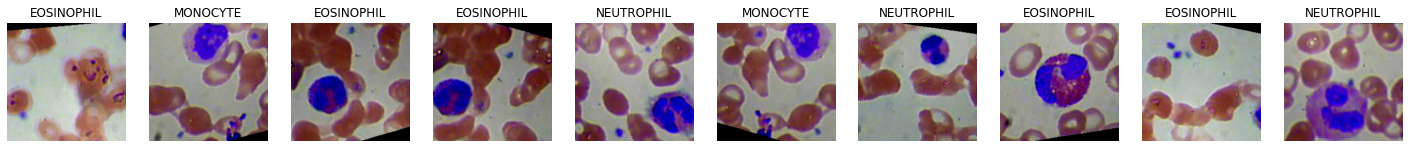

In [11]:
# inspecting some test images
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(25,25), ncols=10)
for ii in range(10):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False,title = classes[labels[ii]])
    print(ii, images[ii].shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

0 torch.Size([3, 224, 224])
1 torch.Size([3, 224, 224])
2 torch.Size([3, 224, 224])
3 torch.Size([3, 224, 224])
4 torch.Size([3, 224, 224])
5 torch.Size([3, 224, 224])
6 torch.Size([3, 224, 224])
7 torch.Size([3, 224, 224])
8 torch.Size([3, 224, 224])
9 torch.Size([3, 224, 224])


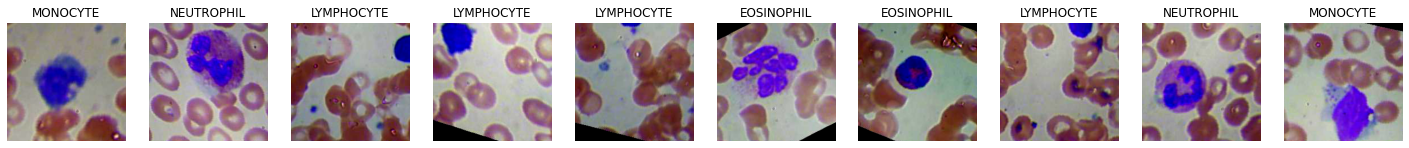

In [12]:
# inspecting some train images
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(25,25), ncols=10)
for ii in range(10):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False, title = classes[labels[ii]])
    print(ii, images[ii].shape)

# Trying with MLP

I want to try the simplest solution first just to see how it operates. I'll probably need to set up a more complicated network with CNN and pooling later.

In [ ]:
224 * 224

50176

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512 # ---------------------------------------------------------- WHY 512????? ----------------------------------------------------------
        hidden_2 = 512
        # linear layer (104976 -> hidden_1)
        self.fc1 = nn.Linear(3 *224 * 224, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 4)
        self.fc3 = nn.Linear(hidden_2, 4)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1,3 * 224 * 224)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=150528, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [14]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
# number of epochs to train the model
n_epochs = 20

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in trainloader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in testloader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(trainloader)
    valid_loss = valid_loss/len(testloader)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.391842 	Validation Loss: 1.390024
Validation loss decreased (inf --> 1.390024).  Saving model ...
Epoch: 2 	Training Loss: 1.385164 	Validation Loss: 1.382472
Validation loss decreased (1.390024 --> 1.382472).  Saving model ...
Epoch: 3 	Training Loss: 1.372781 	Validation Loss: 1.379246
Validation loss decreased (1.382472 --> 1.379246).  Saving model ...
Epoch: 4 	Training Loss: 1.362954 	Validation Loss: 1.389883
Epoch: 5 	Training Loss: 1.348064 	Validation Loss: 1.366023
Validation loss decreased (1.379246 --> 1.366023).  Saving model ...
Epoch: 6 	Training Loss: 1.329319 	Validation Loss: 1.479714
Epoch: 7 	Training Loss: 1.315172 	Validation Loss: 1.299871
Validation loss decreased (1.366023 --> 1.299871).  Saving model ...
Epoch: 8 	Training Loss: 1.304076 	Validation Loss: 1.317746
Epoch: 9 	Training Loss: 1.287761 	Validation Loss: 1.411130
Epoch: 10 	Training Loss: 1.275163 	Validation Loss: 1.237873
Validation loss decreased (1.299871 --> 1.237873)

In [ ]:
output.shape

torch.Size([32, 4])

In [ ]:
target.shape

torch.Size([32])

## Evaluating Results

- Accuracy

- Percentage per class

In [24]:
# track test loss
N_Classes = len(classes)
batch_size = 23
test_loss = 0.0
class_correct = list(0. for i in range(N_Classes))
class_total = list(0. for i in range(N_Classes))

model.eval()
# iterate over test data
for data, target in testloader:

    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(N_Classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.875916

Test Accuracy of EOSINOPHIL: 13% (62/447)
Test Accuracy of LYMPHOCYTE:  5% (22/435)
Test Accuracy of MONOCYTE: 98% (434/440)
Test Accuracy of NEUTROPHIL: 12% (59/472)

Test Accuracy (Overall): 32% (577/1794)


So this is clearly biased towards the monocytes. I think a more complex architecture should help here, next thing to try will be - 
- convolutional networks
- network sizes more appropriate for this image size (here for example I narrowed my data from 224*224 to 512 in the first layer which might have been rough)
- try other optimizers and learning rates.

# Setting the Architecture

I set it to be like the one in the cifar10 solution and will adjust according to this task later

In [ ]:
# This is architecture for CNN network. I'm not sure how to specify the layers sizes here, especially the first (self.conv1) and the flatten in forward...
# In the init we specify the layers of our network, in the forward we specify how they behave.


import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 4)
        self.fc2 = nn.Linear(500, 4)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()